In [5]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score

2024-10-31 12:57:40.893863: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-31 12:57:41.096573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-31 12:57:41.172450: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-31 12:57:41.194024: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-31 12:57:41.340528: I tensorflow/core/platform/cpu_feature_guar

In [7]:
dataset=pd.read_csv("creditcard.csv")

In [8]:
dataset.head(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
len(dataset.columns)

31

In [13]:
dataset.isnull().values.any()

False

In [14]:
dataset['Class'].unique()

array([0, 1])

In [16]:
dataset['Class'].value_counts(sort=True)

Class
0    284315
1       492
Name: count, dtype: int64

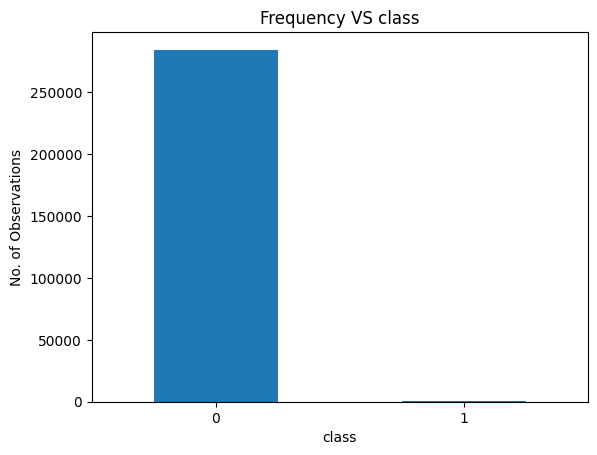

In [17]:
data=dataset['Class'].value_counts(sort=True)
data.plot(kind='bar' , rot=0)
plt.title("Frequency VS class")
plt.xlabel("class")
plt.ylabel("No. of Observations")
plt.show()

Text(0.5, 0, 'Transaction Amount')

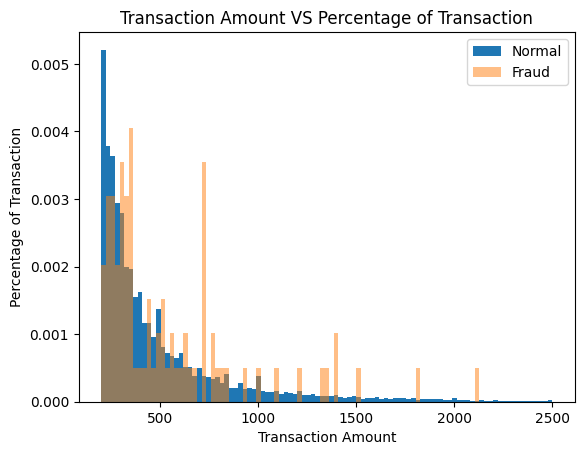

In [21]:
normal_dataset=dataset[dataset['Class']==0]
fraud_dataset=dataset[dataset['Class']==1]

bins=np.linspace(200,2500,100)
plt.hist(normal_dataset.Amount ,bins=bins, alpha=1 , density=True , label='Normal')
plt.hist(fraud_dataset.Amount ,bins=bins, alpha=0.5 , density=True , label='Fraud')
plt.legend(loc='upper right')
plt.title("Transaction Amount VS Percentage of Transaction")
plt.ylabel("Percentage of Transaction")
plt.xlabel("Transaction Amount")

In [22]:
sc=MinMaxScaler()
dataset['Time']=sc.fit_transform(dataset['Time'].values.reshape(-1,1))
dataset['Amount']=sc.fit_transform(dataset['Amount'].values.reshape(-1,1))

In [34]:
rawdata=dataset.values
data=rawdata[:,0:-1]
label=rawdata[:,-1]
train_data ,  test_data , train_labels  ,test_labels=train_test_split(data , label , test_size=0.2 , random_state=2021)


In [35]:
train_data=tf.cast(train_data , tf.float32)
test_data=tf.cast(test_data , tf.float32)

In [37]:
train_labels=train_labels.astype(bool)
test_labels=test_labels.astype(bool)

normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Input
from tensorflow.keras.regularizers import l2


In [48]:
autoencoder=Sequential()
autoencoder.add(Input(shape=(normal_train_data.shape[1],)))
autoencoder.add(Dense(14 , activation='tanh' , activity_regularizer=l2(1e-7)))
autoencoder.add(Dropout(0.2))
autoencoder.add(Dense(7 , activation='relu'))
autoencoder.add(Dense(4 , activation=tf.nn.leaky_relu))
autoencoder.add(Dense(7 , activation='relu'))
autoencoder.add(Dropout(0.2))
autoencoder.add(Dense(14 , activation='relu'))
autoencoder.add(Dense(normal_train_data.shape[1],activation='tanh'))

In [49]:
autoencoder.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 14)             │           434 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 7)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 14)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 30)             │           450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,168 (4.56 KB)

 Trainable params: 1,168 (4.56 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
mc=ModelCheckpoint(filepath='autoencoder_fraud.keras' , monitor='val_loss' , mode='min' , verbose=2 , save_best_only=True)

In [53]:
es=EarlyStopping(monitor='val_loss' , verbose=1 , mode='min' , min_delta=0.0001 , patience=10 , restore_best_weights=True)

In [55]:
autoencoder.compile(metrics=['mse'] , optimizer='adam' , loss='mean_squared_error')

In [59]:
H=autoencoder.fit(normal_train_data , normal_train_data , batch_size=64 , epochs=50  , callbacks=[mc,es])

Epoch 1/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 693us/step - loss: 0.7201 - mse: 0.7201
Epoch 2/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 665us/step - loss: 0.7392 - mse: 0.7392
Epoch 3/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 654us/step - loss: 0.7191 - mse: 0.7191
Epoch 4/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 663us/step - loss: 0.7113 - mse: 0.7113
Epoch 5/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 653us/step - loss: 0.7283 - mse: 0.7283
Epoch 6/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 658us/step - loss: 0.7189 - mse: 0.7189
Epoch 7/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 661us/step - loss: 0.7144 - mse: 0.7144
Epoch 8/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 649us/step - loss: 0.7202 - mse: 0.7202
Epoch 9/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 656us/step - loss: 0.7253 - mse: 0.7253
Epoch 10/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 665us/step - loss: 0.7259 - mse: 0.7259
Epoch 11/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 657us/step - loss: 0.7321 - mse: 0.7321
Epoch 12/50
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 657us/step - loss

KeyError: 'val_loss'

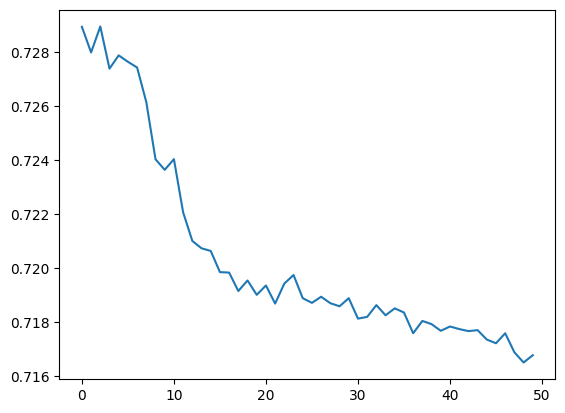

In [64]:
plt.plot(H.history['loss'] , label='test')
plt.plot(H.history['val_loss'] , label='train')
plt.title("Model loss")
plt.xlabel("epochs")
plt.yabel("loss")
plt.legend(loc='upper right')
plt.show()

In [67]:
test_x_pred=autoencoder.predict(test_data)
mse=np.mean(np.power((test_data-test_x_pred),2),axis=1)
error_df=pd.DataFrame({"Reconstruction_error":mse , "True_class":test_labels})

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 3s 458us/step
threshold: 6.132993388175974


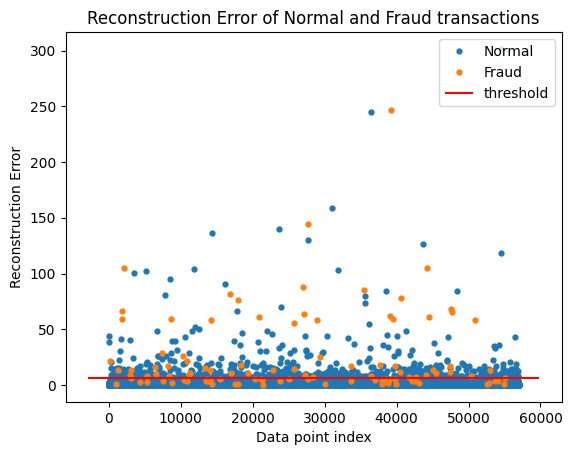

In [69]:
train_pred=autoencoder.predict(normal_train_data)
train_loss=np.mean(np.power((normal_train_data-train_pred),2),axis=1)
threshold=np.percentile(train_loss , 99)
print("threshold:" , threshold)
groups=error_df.groupby('True_class')
fig , ax=plt.subplots()
for name , group in groups:
    ax.plot(group.index, group.Reconstruction_error  , marker='o', ms=3.5 , linestyle='' , label='Fraud' if name==1 else "Normal")

ax.hlines(threshold , ax.get_xlim()[0] , ax.get_xlim()[1] , colors='r' , zorder=100 , label='threshold' )
plt.legend(loc='upper right')
plt.title("Reconstruction Error of Normal and Fraud transactions")
plt.xlabel("Data point index")
plt.ylabel("Reconstruction Error")
plt.show()

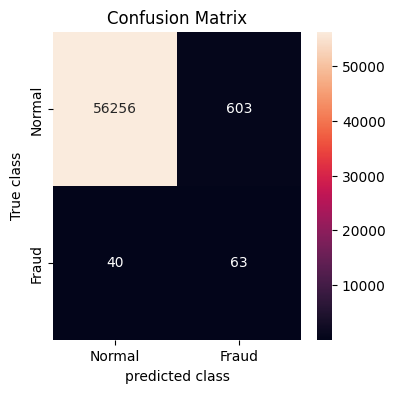

In [72]:
pred_y=[1 if e>threshold else 0 for e in error_df.Reconstruction_error.values]
error_df['pred']=pred_y
conf_matrix=confusion_matrix(error_df.True_class , pred_y)
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix , xticklabels=['Normal' , 'Fraud'],yticklabels=['Normal' , 'Fraud'] , annot=True , fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("predicted class")
plt.ylabel("True class")
plt.show()

In [73]:
print("Accuracy:" , accuracy_score(error_df["True_class"] , error_df["pred"]))
print("Precision:" , precision_score(error_df["True_class"] , error_df["pred"]))
print("Recall:" , recall_score(error_df["True_class"] , error_df["pred"]))

Accuracy: 0.9887117727607879
Precision: 0.0945945945945946
Recall: 0.6116504854368932
